# ERA 5

In [ ]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

import time

path = 'mypath'

In [ ]:
df_metadata_train = pd.read_csv(path + 'df_metadata_train.csv', index_col=0)
df_metadata_train.index = df_metadata_train.index.astype(str)

df_metadata_test = pd.read_csv(path + 'df_metadata_test.csv', index_col=0)
df_metadata_test.index = df_metadata_test.index.astype(str)

### ERA data analysis

In [ ]:
era_1 = xr.open_dataset(path+'ERA5_2018_2019.nc')
era_2 = xr.open_dataset(path+'ERA5_2020_2021.nc')
era = era_1.merge(era_2)
era

<xarray.Dataset>
Dimensions:    (longitude: 33, latitude: 37, time: 35064)
Coordinates:
  * longitude  (longitude) float32 -6.0 -5.75 -5.5 -5.25 ... 1.25 1.5 1.75 2.0
  * latitude   (latitude) float32 59.0 58.75 58.5 58.25 ... 50.5 50.25 50.0
  * time       (time) datetime64[ns] 2018-01-01 ... 2021-12-31T23:00:00
Data variables:
    skt        (time, latitude, longitude) float32 281.9 281.9 ... 284.2 284.0
    ssrd       (time, latitude, longitude) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    strd       (time, latitude, longitude) float32 1.029e+06 ... 1.227e+06
    tcc        (time, latitude, longitude) float32 0.9844 0.9794 ... 0.6507
Attributes:
    Conventions:  CF-1.6
    history:      2023-08-25 16:30:55 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [ ]:
era.to_netcdf(path+'ERA5_full.nc')

In [ ]:
era = xr.open_dataset(path+'ERA5_full.nc')

In [ ]:
era['skt'] = era['skt']-273.15
era.to_netcdf(path+'ERA5_full.nc')

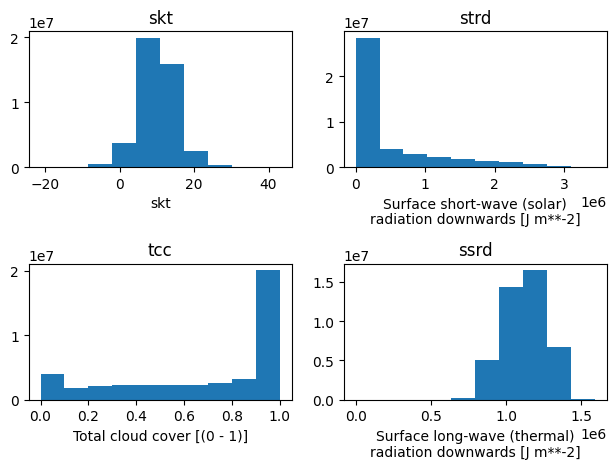

In [ ]:
f, ax = plt.subplots(2,2)

era.skt.plot(ax=ax[0][0])
era.ssrd.plot(ax=ax[0][1])
era.strd.plot(ax=ax[1][1])
era.tcc.plot(ax=ax[1][0])

f.tight_layout()
plt.show()

In [ ]:
np.isnan(era).sum()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    skt      int64 0
    ssrd     int64 0
    strd     int64 0
    tcc      int64 0

In [ ]:
era_averaged = era.mean(dim=["latitude", "longitude"]).copy()
era_averaged

<xarray.Dataset>
Dimensions:  (time: 35064)
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 ... 2021-12-31T23:00:00
Data variables:
    skt      (time) float32 6.338 6.239 6.135 6.12 ... 9.485 9.49 9.634 9.618
    ssrd     (time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 1.459e+04
    strd     (time) float32 1.034e+06 1.023e+06 1.019e+06 ... 1.247e+06 1.22e+06
    tcc      (time) float32 0.8076 0.7676 0.6829 0.6746 ... 0.9793 0.9848 0.9685

In [ ]:
era_averaged = era_averaged.expand_dims(dim={"year": era["time.year"].data}).copy()

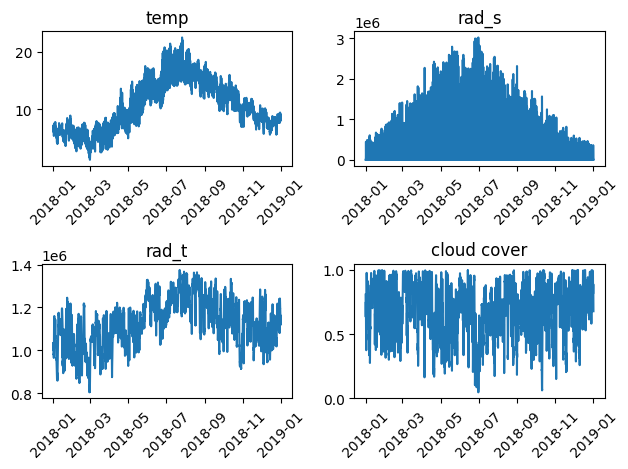

In [ ]:
f, ax = plt.subplots(2,2)

ax[0][0].plot(era_averaged.time.sel(time=slice('2018')),   era_averaged.skt.sel(time=slice('2018')).data, label='temp')
ax[0][1].plot(era_averaged.time.sel(time=slice('2018')),  era_averaged.ssrd.sel(time=slice('2018')).data, label='rads')
ax[1][0].plot(era_averaged.time.sel(time=slice('2018')),  era_averaged.strd.sel(time=slice('2018')).data, label='radt')
ax[1][1].plot(era_averaged.time.sel(time=slice('2018')),   era_averaged.tcc.sel(time=slice('2018')).data, label='cloud cover')


ax[0][0].set_title('temp')
ax[0][1].set_title('rad_s')
ax[1][0].set_title('rad_t')
ax[1][1].set_title('cloud cover')


ax[0][0].tick_params(axis='x', labelrotation=45)
ax[0][1].tick_params(axis='x', labelrotation=45)
ax[1][0].tick_params(axis='x', labelrotation=45)
ax[1][1].tick_params(axis='x', labelrotation=45)


f.tight_layout()
plt.show()

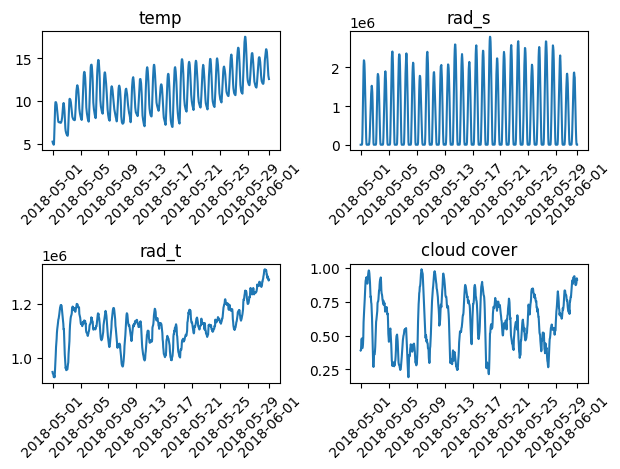

In [ ]:
f, ax = plt.subplots(2,2)

ax[0][0].plot(era_averaged.time.sel(time='2018-05'),   era_averaged.skt.sel(time='2018-05').data, label='temp')
ax[0][1].plot(era_averaged.time.sel(time='2018-05'),  era_averaged.ssrd.sel(time='2018-05').data, label='rads')
ax[1][0].plot(era_averaged.time.sel(time='2018-05'),  era_averaged.strd.sel(time='2018-05').data, label='radt')
ax[1][1].plot(era_averaged.time.sel(time='2018-05'),   era_averaged.tcc.sel(time='2018-05').data, label='cloud cover')


ax[0][0].set_title('temp')
ax[0][1].set_title('rad_s')
ax[1][0].set_title('rad_t')
ax[1][1].set_title('cloud cover')


ax[0][0].tick_params(axis='x', labelrotation=45)
ax[0][1].tick_params(axis='x', labelrotation=45)
ax[1][0].tick_params(axis='x', labelrotation=45)
ax[1][1].tick_params(axis='x', labelrotation=45)


f.tight_layout()
plt.show()

In [ ]:
era_df = era.skt.to_dataframe()

In [ ]:
era_df_map = era_df.reset_index().groupby(['latitude', 'longitude']).mean().reset_index()

In [ ]:
era_df_map = era_df_map.set_index(pd.MultiIndex.from_product([era_df_map.latitude.unique(),
                                                era_df_map.longitude.unique()]))

In [ ]:
df_metadata = pd.concat([df_metadata_test, df_metadata_train])

In [ ]:
era_df_map

latitude  longitude        skt
50.0 -6.00      50.0      -6.00  12.700212
     -5.75      50.0      -5.75  12.704839
     -5.50      50.0      -5.50  12.606254
     -5.25      50.0      -5.25  12.523648
     -5.00      50.0      -5.00  12.633821
...              ...        ...        ...
59.0  1.00      59.0       1.00  10.138249
      1.25      59.0       1.25  10.155601
      1.50      59.0       1.50  10.195532
      1.75      59.0       1.75  10.225795
      2.00      59.0       2.00  10.231789

[1221 rows x 3 columns]

In [ ]:
df_metadata['average_temp'] = np.zeros(df_metadata.shape[0])
for ss_id in df_metadata.index:
  df_metadata.at[ss_id, 'average_temp'] = era_df_map.loc[(np.round(df_metadata.loc[ss_id]['latitude_rounded']),
                                                          np.round(df_metadata.loc[ss_id]['longitude_rounded']))]['skt']

In [ ]:
df_metadata

,latitude_rounded,longitude_rounded,llsoacd,orientation,tilt,kwp,operational_at,average_temp
ss_id,,,,,,,,
6798,53.72,0.04,E01013079,180.0,30.0,4.00,2012-10-04,10.239019
27067,53.52,-2.48,E01006291,117.0,33.0,2.00,2018-04-18,8.490474
26791,51.32,-2.84,E01014741,240.0,45.0,4.00,2018-04-18,10.837779
7581,52.08,0.72,E01029900,250.0,45.0,4.00,2013-06-17,11.212137
2770,52.40,-1.91,E01032134,210.0,30.0,4.00,2011-11-10,10.488194
...,...,...,...,...,...,...,...,...
6601,50.47,-3.53,E01015259,180.0,40.0,3.84,2012-08-20,13.108742
26987,51.89,-0.35,E01023625,90.0,35.0,1.50,2018-04-18,10.929831
6646,57.52,-2.00,S00092861,130.0,30.0,4.00,2012-10-02,9.975348


In [ ]:
import plotly.express as px

df = px.data.gapminder().query("year == 2007")
fig = px.scatter_geo(df_metadata,
                     lon='longitude_rounded',
                     lat='latitude_rounded',
                     color='average_temp')

fig.update_layout(geo_scope='europe', title='Average Temperature')
fig.update_geos(fitbounds="locations")
fig.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

era_exp = era.copy()

for key in list(['skt', 'ssrd', 'strd']):
  # Reshape the data into a 2D array
  key_ss = era[key].data.reshape(-1, 1)
  print(key, key_ss.shape)

  if key == 'skt':
    # Standardize the data
    scaler = StandardScaler()
    key_ss = scaler.fit_transform(key_ss)
  else:
    key_ss = (key_ss/(key_ss.max()))-key_ss.min()

  # Reshape the standardized data back into an xarray
  era_exp[key] = xr.DataArray(key_ss.reshape((35064,37,33)), coords=[era.time,
                                                                    era.latitude,
                                                                    era.longitude], dims=['time',
                                                                                          'latitude', 'longitude'])

skt (42813144, 1)
ssrd (42813144, 1)
strd (42813144, 1)


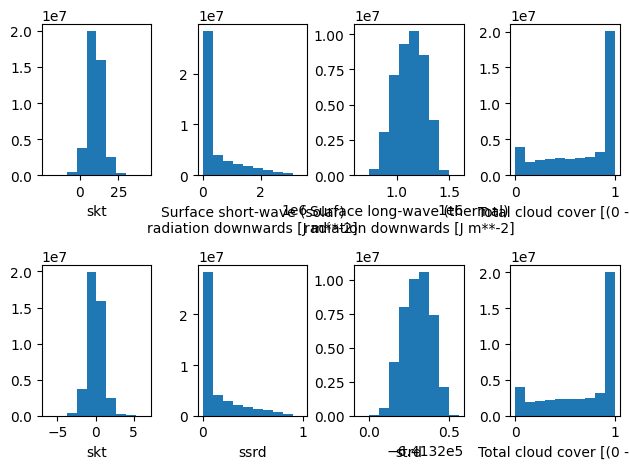

In [ ]:
f, ax = plt.subplots(2,4)

era.skt.plot(ax=ax[0][0])
era.ssrd.plot(ax=ax[0][1])
era.strd.plot(ax=ax[0][2])
era.tcc.plot(ax=ax[0][3])


era_exp.skt.plot( ax=ax[1][0])
era_exp.ssrd.plot(ax=ax[1][1])
era_exp.strd.plot(ax=ax[1][2])
era_exp.tcc.plot( ax=ax[1][3])

f.tight_layout()
plt.show()

In [ ]:
era_exp.to_netcdf(path+'ERA5_scaled.nc')

### indexing

In [ ]:
era = xr.open_dataset(path+'ERA5_scaled.nc')

In [ ]:
era = era.drop_vars("strd").copy()
era

<xarray.Dataset>
Dimensions:    (time: 35064, latitude: 37, longitude: 33)
Coordinates:
  * time       (time) datetime64[ns] 2018-01-01 ... 2021-12-31T23:00:00
  * latitude   (latitude) float32 59.0 58.75 58.5 58.25 ... 50.5 50.25 50.0
  * longitude  (longitude) float32 -6.0 -5.75 -5.5 -5.25 ... 1.25 1.5 1.75 2.0
Data variables:
    skt        (time, latitude, longitude) float32 ...
    ssrd       (time, latitude, longitude) float32 ...
    tcc        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-08-25 16:30:55 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [ ]:
df_metadata = pd.concat([df_metadata_test, df_metadata_train])

In [ ]:
def roundPartial (value, resolution=0.25):
    return round (value / resolution) * resolution

df_metadata['latitude'] = (df_metadata['latitude_rounded']).apply(roundPartial)
df_metadata['longitude'] = (df_metadata['longitude_rounded']).apply(roundPartial)

In [ ]:
xr_train = xr.open_dataset(path+"xr_train_timestamped.netcdf")

In [ ]:
timerange = xr_train.datetime.data

In [ ]:
timerange_df = pd.Series(index=timerange, data=timerange)
timerange_df.index = timerange_df.index.set_names('datetime')

In [ ]:
era_indexed = era.sel(
    time=timerange_df.to_xarray(),
    method='nearest'
).copy()

In [ ]:
era_indexed.to_netcdf(path+"era_ssid.nc")

In [ ]:
era_indexed_stacked = era_indexed.stack(grid=('latitude', 'longitude'))

In [ ]:
df_metadata['grid'] = list(map(lambda x: (df_metadata.loc[x]['latitude'],
                                          df_metadata.loc[x]['longitude']), df_metadata.index))

In [ ]:
era_datetime_ssid = era_indexed_stacked.sel(
    grid=df_metadata['grid'].to_xarray()
)
era_datetime_ssid = era_datetime_ssid.drop(['grid', 'latitude', 'longitude'])
era_datetime_ssid.to_netcdf(path+'era_stamped.nc')